# SETUP AND LOAD DATA

In [2]:
pip install tensorflow opencv-python matplotlib


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tesorflow-gpu

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tesorflow-gpu (from versions: none)
ERROR: No matching distribution found for tesorflow-gpu

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#tensorflow-----for the part of the deep learning pipeline
#tensorflow-gpu---for the part of the deep learning pipeline
#opencv---------to remove dodgy images
#matplotlib-----will be used to visualise images

In [3]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
altair                       5.0.1
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        23.1.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
blinker                      1.6.2
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.1.0
click                        8.1.3
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
defusedxml                   0.7.1
executing                    1.2.0
fa


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow as tf
import os # for navigating through directeries

In [7]:
gpus=tf.config.experimental.list_physical_devices('CPU') # JUST TELLING HOW MANY AVAILAIBLE DEVICES

In [8]:

len(gpus)

1

In [9]:
#avoid OOM OUT OF MEMORY errors by setting memory consumption growth FOR GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

# REMOVE DODGY IMAGES

In [20]:
import cv2 
import imghdr # to check the file extension
from matplotlib import pyplot as plt

In [11]:
data_dir='data'

In [26]:
#os.listdir(data_dir)

In [27]:
#os.listdir(os.path.join(data_dir,'happy'))

In [13]:
image_exts=['jpeg','jpg','bmp','png']

In [34]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img= cv2.imread(image_path)
            tip= imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in extension list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
                print('Issue with image {}'.format(image_path))
                #os.remove(image_path  )

In [ ]:
# lets see what cv2 do 
#img =cv2.imread(os.path.join('data','happy','154006829.jpg'))


In [28]:
#img # it will show it as a numpyarray after that lets check its shape

In [29]:
#img.shape

In [30]:
#here 3744-is pixel height, 5616 pixels wide and 3 for coloured image
#lets plot this image

In [31]:
#plt.imshow(img)

In [32]:
# its in weird color as cv2 read in bgr and matplotlib as rgb
#lets fix this 
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

# LOAD DATA


In [35]:
tf.data.Dataset??

In [37]:
import numpy as np

In [94]:
data= tf.keras.utils.image_dataset_from_directory('data')  #BUILIDING THE PIPELINE
#will resize #will batch ur image and more

Found 171 files belonging to 2 classes.


In [43]:
tf.keras.utils.image_dataset_from_directory??

In [46]:
#data[0] not working so convert it into numpy iterator

In [93]:
data_iterator= data.as_numpy_iterator() #ALLOWING TO ITERATE/ACCESS OVER DATA

In [48]:
data_iterator

In [65]:
batch=data_iterator.next() #ACCESSING THE DATA IN BATCH

In [66]:
batch #see what we get 
#its length will be 2 (1. image representation 2. label)
batch[0]
batch[1]
#IMAGE REPRESENTATION 
batch[0].shape

(32, 256, 256, 3)

In [67]:
#32-batch size #256,256 image #3-colored

In [68]:
#tf.keras.utils.image_dataset_from_directory('data'.batch_size=8, image_size=(128,128)) 
# TO CHANGE BATCH SIZE AND IMAGE SIZE

In [73]:
batch[1] 
#labels  HAPPY=0 SAD=1

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

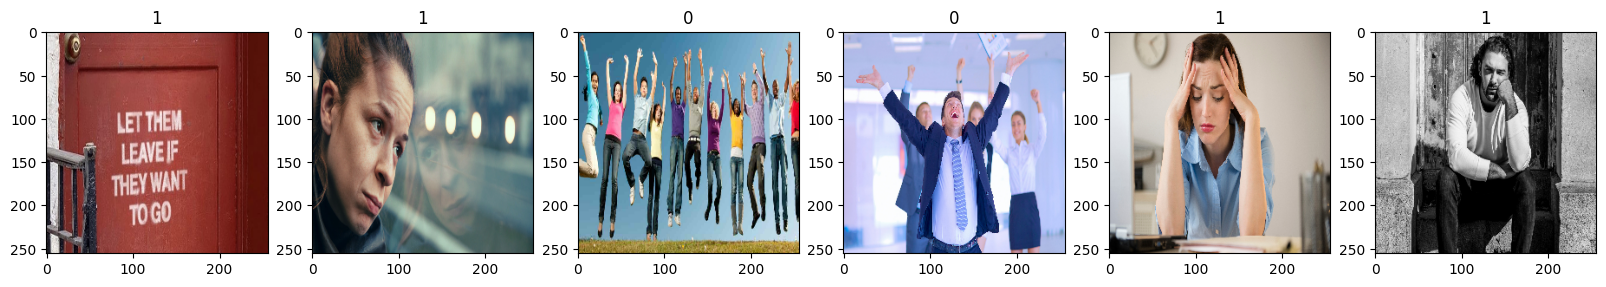

In [72]:
fig, ax =plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

'''     plt.subplots(ncols=6, figsize=(20, 20)) 
creates a figure with 6 subplots arranged horizontally (ncols=6 specifies the number of columns).
The figsize=(20, 20) parameter sets the size of the figure to be 20 inches by 20 inches.

    fig, ax = is used to assign the created figure and axes objects to variables fig and ax, respectively.
    fig represents the entire figure, while ax is an array of axes objects corresponding to each subplot.

The next part of the code is a loop that iterates over a batch of images and displays them in the subplots:

for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

    enumerate(batch[0][:6]) creates an iterator that returns both the index (idx) and 
    the value (img) of each image in the batch. batch[0][:6] selects the first six images from the batch.

    ax[idx].imshow(img.astype(int)) plots the image img on the idx-th subplot using the imshow function. 
    The astype(int) converts the image data type to integers.

    ax[idx].title.set_text(batch[1][idx]) sets the title of the idx-th subplot to the corresponding label from batch[1],
    which is assumed to be a list of labels for each image.

Overall, the code creates a figure with six subplots, 
and then displays the first six images from a batch on these subplots, 
along with their corresponding labels as titles.
'''

# PREPROCESSING DATA
## scaling Data

In [95]:
#batch[0].max()would be 255 maybe 
#batch[0].min()would be 0
#TO RESIZE IT AND WE CANT DO IT EVERYTIME BATCH CHANGES SO DOING USING
#DATA PIPELINE
data= data.map(lambda x,y:(x/255,y))
#converting our images into values from 0-1

In [96]:
scaled_iterator = data.as_numpy_iterator()

In [97]:
batch = scaled_iterator.next()

In [103]:
batch[0].max()

1.0

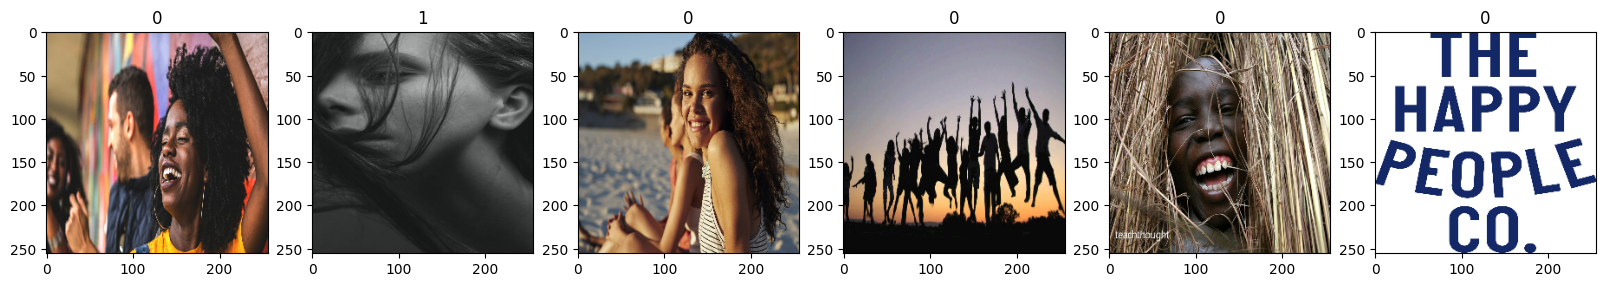

In [104]:
fig, ax =plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## SPLITTING DATA

In [105]:
    len(data)

6

In [114]:
train_size= int(len(data)*.7)
test_size= int(len(data)*.2)
val_size= int(len(data)*.1)+1

In [115]:
train_size

4

In [116]:
test_size

1

In [113]:
val_size

1

In [118]:
train= data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)

In [119]:
len(test)

1

# DEEP MODEL

### BUILD DEEP NEURAL NETWORK LEARNING MODEL

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Dense, Flatten

In [134]:
model=Sequential()

In [135]:
#1st layer is convulational layer user to scan an image try to condense and extraxt relevant 
#information from image to do a classification
# 16--filters 3,3--filter will be 3by3 pixel size   1--it moves pixel by pixel
#all the hyper parameters(16, 3,3 ,1) can be changed its as per the architectural decision
#input from conv layer passed through relu to  preserv+ve part

model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) #taking max value after condesnsing the info from the relu and return bCK tht value

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
#condesing the filter (are the last channel) values to 1 so that it can be used in dense layers as 
#their output need to be 1 from multi dimension to single 

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#this final single output represenst our result(0/1)(happy/sad) as we used sigmoid activation

In [136]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
#adam=optimizer #accuracy tells us how much model is classifying correctly 0/1

In [137]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

# TRAIN

In [138]:
logdir= 'logs'

In [139]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [141]:
hist= model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
#epochs=  no of times run over to training data

Epoch 1/20
4/4 [==============================] - 38s 5s/step - loss: 1.4509 - accuracy: 0.4375 - val_loss: 0.6292 - val_accuracy: 0.6250
Epoch 2/20
4/4 [==============================] - 18s 4s/step - loss: 0.7882 - accuracy: 0.5938 - val_loss: 0.7099 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 19s 4s/step - loss: 0.6784 - accuracy: 0.6719 - val_loss: 0.6379 - val_accuracy: 0.8438
Epoch 4/20
4/4 [==============================] - 18s 4s/step - loss: 0.6392 - accuracy: 0.6328 - val_loss: 0.6368 - val_accuracy: 0.4688
Epoch 5/20
4/4 [==============================] - 19s 4s/step - loss: 0.5703 - accuracy: 0.6406 - val_loss: 0.5148 - val_accuracy: 0.6562
Epoch 6/20
4/4 [==============================] - 18s 4s/step - loss: 0.5245 - accuracy: 0.7188 - val_loss: 0.4512 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 18s 4s/step - loss: 0.4497 - accuracy: 0.8281 - val_loss: 0.4244 - val_accuracy: 0.8438
Epoch 8/20
4/4 [==================

In [142]:
hist.history

{'loss': [1.450918436050415,
  0.788205623626709,
  0.6783502697944641,
  0.6391580104827881,
  0.5703431367874146,
  0.524481475353241,
  0.4497424066066742,
  0.42831146717071533,
  0.3411851227283478,
  0.26283419132232666,
  0.2012505680322647,
  0.17136028409004211,
  0.1302584409713745,
  0.1361066848039627,
  0.05973868817090988,
  0.03791331872344017,
  0.02856159210205078,
  0.020827991887927055,
  0.01073128916323185,
  0.009110996499657631],
 'accuracy': [0.4375,
  0.59375,
  0.671875,
  0.6328125,
  0.640625,
  0.71875,
  0.828125,
  0.828125,
  0.8984375,
  0.921875,
  0.953125,
  0.921875,
  0.9765625,
  0.9453125,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6291754245758057,
  0.7099303007125854,
  0.6378890872001648,
  0.6368329524993896,
  0.5148289799690247,
  0.45118069648742676,
  0.42443013191223145,
  0.4899826645851135,
  0.3311096727848053,
  0.1659827083349228,
  0.34779220819473267,
  0.1180322915315628,
  0.19872677326202393,
  0.09528574347496

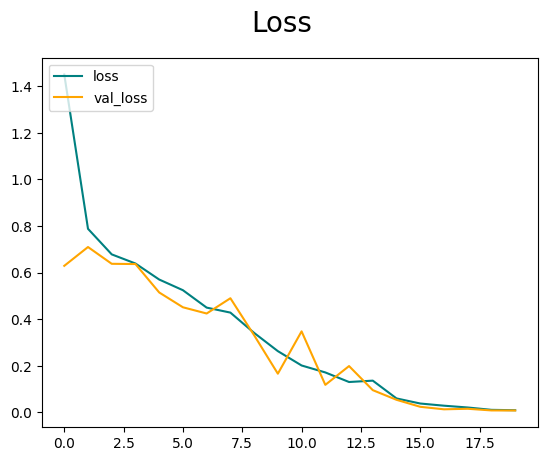

In [144]:
fig= plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

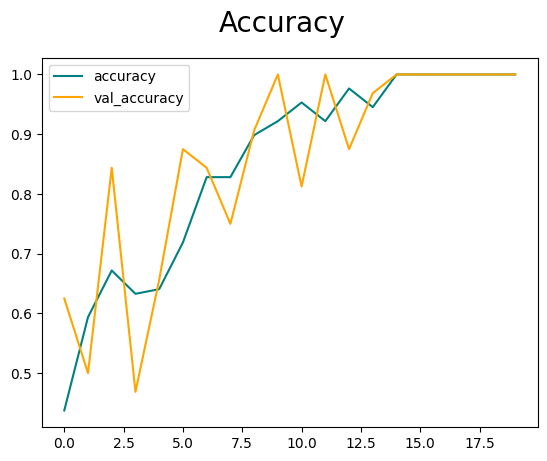

In [146]:
fig= plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# EVALUATE PERFORMANCE

## EVALUATE

In [147]:
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy

In [148]:
pre= Precision()
re= Recall()
acc= BinaryAccuracy()

In [149]:
len(test)

1

In [154]:
for batch in test.as_numpy_iterator():
    X, y= batch  #x=set of images and y= true value
    yhat= model.predict(X) #provide value b/w 0-1 as it passes thu sigmoid fun
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 342ms/step


In [157]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall: 1.0, Accuracy:1.0


## TRAIN

In [158]:
import cv2

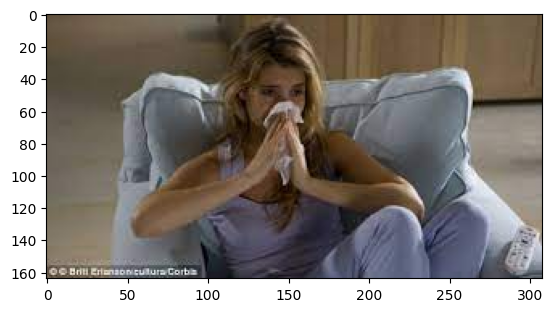

In [167]:
img= cv2.imread('sad.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

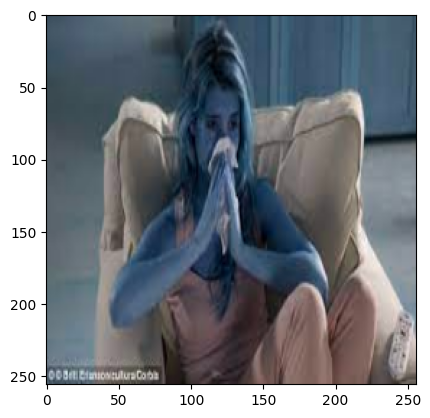

In [168]:
resize= tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [169]:
resize.shape

TensorShape([256, 256, 3])

In [170]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [171]:
yhat= model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 69ms/step


In [172]:
yhat

array([[0.68754137]], dtype=float32)

In [173]:
if yhat > 0.5:
    print(f'predicted class is Sad')
else:
    print(f'Predicted class is Happy')

predicted class is Sad


In [174]:
# run sad test

# SAVE THE MODEL

In [175]:
from tensorflow.keras.models import load_model

In [176]:
model.save(os.path.join('models', 'happysadmodel.h5'))
# saving inside models folder # .h5 is like zipping the model extension

In [182]:
new_model= load_model(os.path.join('models', 'happysadmodel.h5'))
#reloading the model

In [183]:
yhatnew= new_model.predict(np.expand_dims(resize/255, 0))
#passing new data

1/1 [==============================] - 0s 455ms/step


In [184]:
if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
